# Urban Observatory Newcastle University
- Author: Sedar Olmez
- Data source: http://newcastle.urbanobservatory.ac.uk/
- Description: Try downloading live sensory data from Newcastle to gain insight on the movement of people across the city. This will then be part of a pipeline system that inputs the data into an agent based model to simulate. 

In [1]:
import requests
import pandas as pd
import io

In [2]:
def GeoJSON(data={}, metadata={}):
    bundle = {
            'application/geo+json': data,
            'text/plain': '<IPython.display.GeoJSON object>'
    }
    metadata = {
        'application/geo+json': metadata
    }
    display(bundle, metadata=metadata, raw=True)

# Retrieve sensor information:

In [3]:
sensor_params = dict(
    sensor_type = 'Walking North'
)

r = requests.get('http://uoweb3.ncl.ac.uk/api/v1.1/sensors/csv/',sensor_params)

sensor_info = pd.read_csv(io.StringIO(r.text) )
sensor_info

,Sensor Name,Location (WKT),Ground Height Above Sea Level,Sensor Height Above Ground,Broker Name,Third Party,Sensor Centroid Longitude,Sensor Centroid Latitude
0,PER_PEOPLE_NORTHUMERLAND_LINE_SHORT_DISTANCE_H...,POINT (-1.61158161684422 54.9742039587214),43.480000,2.0,People Counting API,False,-1.611582,54.974204
1,PER_PEOPLE_NORTHUMERLAND_LINE_MID_DISTANCE_HEAD_0,POINT (-1.61187546061534 54.974385788398),43.849998,2.0,People Counting API,False,-1.611875,54.974386
2,PER_PEOPLE_NORTHUMERLAND_LINE_SHORT_DISTANCE_H...,POINT (-1.61177165997381 54.9740544132907),43.389999,2.0,People Counting API,False,-1.611772,54.974054
3,PER_PEOPLE_NORTHUMERLAND_LINE_LONG_DISTANCE_HE...,POINT (-1.61221107799805 54.9748085841739),44.549999,2.0,People Counting API,False,-1.612211,54.974809
4,PER_PEOPLE_NORTHUMERLAND_LINE_SHORT_DISTANCE_H...,POINT (-1.61191367348244 54.9742360249308),43.700001,2.0,People Counting API,False,-1.611914,54.974236
5,PER_PEOPLE_NORTHUMERLAND_LINE_SHORT_DISTANCE_H...,POINT (-1.61149967779594 54.9741066654557),43.290001,2.0,People Counting API,False,-1.611500,54.974107
6,PER_PEOPLE_NORTHUMERLAND_LINE_LONG_DISTANCE_HE...,POINT (-1.61208941972901 54.9748314715766),44.639999,2.0,People Counting API,False,-1.612089,54.974831
7,PER_PEOPLE_NORTHUMERLAND_LINE_SHORT_DISTANCE_H...,POINT (-1.61182617919363 54.9741458764597),43.509998,2.0,People Counting API,False,-1.611826,54.974146
8,PER_PEOPLE_NORTHUMERLAND_LINE_SHORT_DISTANCE_H...,POINT (-1.61159110417673 54.9742892668984),43.610001,2.0,People Counting API,False,-1.611591,54.974289


Now that we have all sensors of type Walking North. We can try get the data these sensors capture. 

In [4]:
# Time to plot the sensors on a map.
import smopy
import matplotlib.patheffects as pe

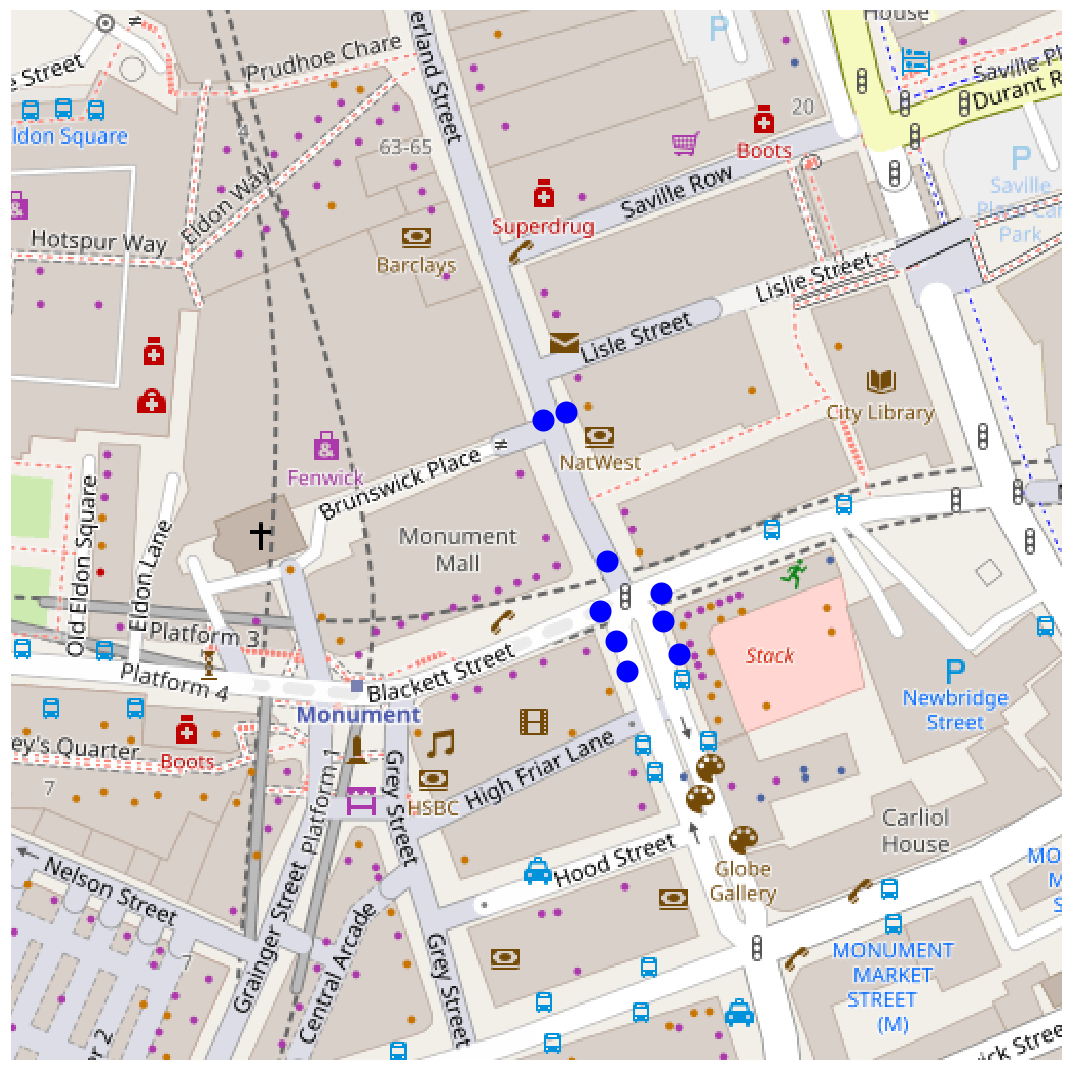

In [5]:
black_box = (
    min(sensor_info['Sensor Centroid Latitude']),
    min(sensor_info['Sensor Centroid Longitude']),
    max(sensor_info['Sensor Centroid Latitude']),
    max(sensor_info['Sensor Centroid Longitude']),
)

map = smopy.Map(black_box, z = 17)
ax = map.show_mpl(figsize=(15, 15))

for i, row in sensor_info.iterrows():
    x, y = map.to_pixels(row['Sensor Centroid Latitude'], row['Sensor Centroid Longitude'])
    ax.plot(x, y, 'ob', ms = 20, mew = 2);